# Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Load The Data

Dataset : https://www.kaggle.com/datasets/suleymancan/turkishnews70000

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Turkishnews70k/turkish_news_70000.csv' , index_col = 'id')
df.head()

,main_image,published,site,text,title,url
id,,,,,,
72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar..."
72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-..."
72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m..."
72340,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:53:00.000+02:00""","""diken.com.tr""","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""http://www.diken.com.tr/agridaki-iyi-partilil..."
72341,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:52:00.000+02:00""","""diken.com.tr""","""Otomobil pazarı iki ayda yarı yarıya eridi 04...","""Otomobil pazarı iki ayda yarı yarıya eridi""","""http://www.diken.com.tr/otomobil-pazari-iki-a..."


## Text Preprocessing & Cleaning

In [4]:
news = df[['text']]
news.head()

,text
id,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04..."


In [5]:
# We will do main 3 things : 
# 1) Use .lower() method on text
# 2) Delete punctions
# 3) Delete stopwords

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords

puncts = string.punctuation
stopwords = stopwords.words('turkish')
stopwords.extend(['bir', 'kadar','sonra'])

def data_cleaning(text):
  # All characters to lower.
  text = text.lower()
  # Lets replace \n characters with space.
  text = text.replace("\\n" , " ")
  # Apostrophes deleted.
  text = re.sub("’(\w+)", "" , text)
  text = re.sub("'(\w+)", "" , text)
  text = re.sub("[“,‘,’,”]", "", text)
  # Numbers deleted.
  text = re.sub("[0-9]+" , "" , text)
  # Delete the punctuations.
  text = "".join(list(map(lambda x : x if x not in puncts else " " , text)))
  # Delete the stopwords.
  text = " ".join([i for i in text.split() if i not in stopwords])
  # Lets drop also a single characters.
  text = " ".join([i for i in text.split() if len(i) > 1])

  return text

In [8]:
news

,text
id,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04..."
...,...
72332,"""Prodigy’nin solisti Keith Flint evinde ölü bu..."
72333,"""Adana’da sahte icra müdürü gerçeğini dolandır..."
72334,"""Maçoğlu’ndan ‘Athena Gökhan’a: O sözler bize ..."


In [9]:
news.iloc[5].text

'"Şubat ayında ihracat yüzde 3.7 arttı, ithalat yüzde 18.7 azaldı 04/03/2019 12:20\\nTicaret Bakanı Ruhsar Pekcan şubat ayında ihracatın yüzde 3.7 artışla 14 milyar 312 milyon dolar, ithalatın yüzde 18.7 azalışla 16 milyar 161 milyon dolar olarak gerçekleştiğini açıkladı. Fotoğraf: Reuters\\nBakan Pekcan şunları söyledi: “ Eskiden kullandığımız Özel Ticaret Sistemine göre de şubat ayında ihracatımız yüzde 3,5 artışla 13 milyar 603 milyon dolar olarak gerçekleşmiştir. ÖTS’ye göre ithalatımız şubat ayında yüzde 16,6 düşüşle 15 milyar 793 milyon dolar seviyesinde gerçekleşmiştir. ” Reklam"'

In [10]:
data_cleaning("Şubat ayında ihracat yüzde 3.7 arttı, ithalat yüzde 18.7 azaldı 04/03/2019 12:20\\nTicaret Bakanı Ruhsar Pekcan şubat ayında ihracatın yüzde 3.7 artışla 14 milyar 312 milyon dolar, ithalatın yüzde 18.7 azalışla 16 milyar 161 milyon dolar olarak gerçekleştiğini açıkladı. Fotoğraf: Reuters\\nBakan Pekcan şunları söyledi: “ Eskiden kullandığımız Özel Ticaret Sistemine göre de şubat ayında ihracatımız yüzde 3,5 artışla 13 milyar 603 milyon dolar olarak gerçekleşmiştir. ÖTS’ye göre ithalatımız şubat ayında yüzde 16,6 düşüşle 15 milyar 793 milyon dolar seviyesinde gerçekleşmiştir. ” Reklam")

'şubat ayında ihracat yüzde arttı ithalat yüzde azaldı ticaret bakanı ruhsar pekcan şubat ayında ihracatın yüzde artışla milyar milyon dolar ithalatın yüzde azalışla milyar milyon dolar olarak gerçekleştiğini açıkladı fotoğraf reuters bakan pekcan şunları söyledi eskiden kullandığımız özel ticaret sistemine göre şubat ayında ihracatımız yüzde artışla milyar milyon dolar olarak gerçekleşmiştir öts göre ithalatımız şubat ayında yüzde düşüşle milyar milyon dolar seviyesinde gerçekleşmiştir reklam'

In [11]:
news['text'] = news['text'].apply(lambda x : data_cleaning(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
news

,text
id,
72337,yatırım bankası dolar tl üçüncü çeyrekte görec...
72338,pi̇ar araştırma adana antalya millet ittifakı ...
72339,renaissance capital merkez bankası hafta baz p...
72340,ağrı i̇yi̇ partililerin istifa gerekçesi akp s...
72341,otomobil pazarı iki ayda yarı yarıya eridi oto...
...,...
72332,prodigy solisti keith flint evinde ölü bulundu...
72333,adana sahte icra müdürü gerçeğini dolandırdı a...
72334,maçoğlu athena gökhan sözler bize enerji verdi...


## Tokenization

In [13]:
news['text']

id
72337    yatırım bankası dolar tl üçüncü çeyrekte görec...
72338    pi̇ar araştırma adana antalya millet ittifakı ...
72339    renaissance capital merkez bankası hafta baz p...
72340    ağrı i̇yi̇ partililerin istifa gerekçesi akp s...
72341    otomobil pazarı iki ayda yarı yarıya eridi oto...
                               ...                        
72332    prodigy solisti keith flint evinde ölü bulundu...
72333    adana sahte icra müdürü gerçeğini dolandırdı a...
72334    maçoğlu athena gökhan sözler bize enerji verdi...
72335    hasköy hızır gelmiş meçhul birisi kapılara lir...
72336    meb yönetimi isyan etti diyarbakır öğretmene h...
Name: text, Length: 72109, dtype: object

In [14]:
news['text_token'] = news['text'].apply(lambda x: x.split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
news

,text,text_token
id,,
72337,yatırım bankası dolar tl üçüncü çeyrekte görec...,"[yatırım, bankası, dolar, tl, üçüncü, çeyrekte..."
72338,pi̇ar araştırma adana antalya millet ittifakı ...,"[pi̇ar, araştırma, adana, antalya, millet, itt..."
72339,renaissance capital merkez bankası hafta baz p...,"[renaissance, capital, merkez, bankası, hafta,..."
72340,ağrı i̇yi̇ partililerin istifa gerekçesi akp s...,"[ağrı, i̇yi̇, partililerin, istifa, gerekçesi,..."
72341,otomobil pazarı iki ayda yarı yarıya eridi oto...,"[otomobil, pazarı, iki, ayda, yarı, yarıya, er..."
...,...,...
72332,prodigy solisti keith flint evinde ölü bulundu...,"[prodigy, solisti, keith, flint, evinde, ölü, ..."
72333,adana sahte icra müdürü gerçeğini dolandırdı a...,"[adana, sahte, icra, müdürü, gerçeğini, doland..."
72334,maçoğlu athena gökhan sözler bize enerji verdi...,"[maçoğlu, athena, gökhan, sözler, bize, enerji..."


## Modelling

In [16]:
!pip install pyLDavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 3.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c641f74292b972a55e05eca23b6dee29ef91cbb15d65102f9bf015e59bf674f7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=4b0730786c45a344c10c705a0bdb562e5b5553293404c9fed69afa227dd0db1e
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDavis sklearn


In [17]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import gensim
import pyLDAvis.gensim_models # For the figure of LDA Modelling.

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [19]:
# Vocabulary Creating
tokenized_texts = news['text_token']
words = gensim.corpora.Dictionary(tokenized_texts)

# Filter the words
words.filter_extremes(no_below = 1 , no_above = 0.7)

In [20]:
# Vectorization to tokens.
text_matrix = [words.doc2bow(term) for term in tokenized_texts]

In [21]:
# LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus = text_matrix,
                                            id2word = words,
                                            num_topics = 15,
                                            passes = 10)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * l

## Results

In [22]:
topics = lda_model.print_topics(num_words = 7)

for topic in topics : 
  print(topic)

(0, '0.020*"abd" + 0.012*"türkiye" + 0.009*"suriye" + 0.007*"rusya" + 0.006*"trump" + 0.006*"başkanı" + 0.005*"avrupa"')
(1, '0.021*"chp" + 0.018*"belediye" + 0.015*"başkan" + 0.014*"başkanı" + 0.014*"parti" + 0.012*"i̇stanbul" + 0.012*"adayı"')
(2, '0.007*"yıl" + 0.005*"hapis" + 0.005*"hakkında" + 0.005*"ceza" + 0.004*"karar" + 0.004*"olduğu" + 0.004*"reklam"')
(3, '0.010*"olay" + 0.009*"polis" + 0.007*"kişi" + 0.007*"meydana" + 0.007*"geldi" + 0.006*"gelen" + 0.006*"ekipleri"')
(4, '0.011*"türkiye" + 0.008*"olarak" + 0.006*"eğitim" + 0.005*"önemli" + 0.004*"türk" + 0.004*"dedi" + 0.004*"iş"')
(5, '0.012*"fenerbahçe" + 0.010*"galatasaray" + 0.009*"beşiktaş" + 0.008*"spor" + 0.008*"lig" + 0.007*"son" + 0.006*"süper"')
(6, '0.021*"sosyal" + 0.020*"twitter" + 0.020*"medya" + 0.017*"venezuela" + 0.012*"paylaş" + 0.012*"facebook" + 0.011*"yorum"')
(7, '0.040*"yorum" + 0.029*"yorumlar" + 0.026*"com" + 0.023*"haberturk" + 0.014*"sayfalarında" + 0.014*"şekilde" + 0.013*"türkiye"')
(8, '0.008*

In [23]:
# pyLDavis.enable_notebook()
image = pyLDAvis.gensim_models.prepare(lda_model, text_matrix , words , mds = 'mmds' )
pyLDAvis.display(image)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


## Choose the best topic number with coherence

In [24]:
from gensim.models import CoherenceModel

topic_num_space = range(9,30,3)

In [25]:
coherence_score_list = []
topic_num_list = []

for topic_num in topic_num_space:
  lda_model = gensim.models.ldamodel.LdaModel(corpus = text_matrix,
                                              id2word = words,
                                              num_topics = topic_num,
                                              passes = 10)
  
  coherence_model_lda = CoherenceModel(model = lda_model , texts = tokenized_texts,
                                       dictionary = words, coherence = 'c_v')
  
  temporary_coherence_score_lda = coherence_model_lda.get_coherence()
  coherence_score_list.append(temporary_coherence_score_lda)
  topic_num_list.append(topic_num)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * l

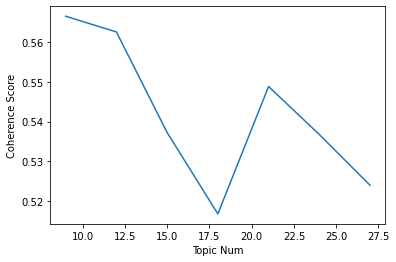

In [26]:
import matplotlib.pyplot as plt

plt.plot(topic_num_list, coherence_score_list , "-"),
plt.xlabel("Topic Num")
plt.ylabel("Coherence Score")

plt.show()

In [27]:
# Best num_topics = 9

lda_model = gensim.models.ldamodel.LdaModel(corpus = text_matrix,
                                           id2word = words,
                                           num_topics = 9, 
                                           passes = 10)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * l

In [28]:
# Lets look most used 7 terms in created topics.

konular = lda_model.print_topics(num_words=7) 
konular = sorted(konular, key = lambda x: x[0]) 
for konu in konular:
    print(konu)

(0, '0.040*"yorum" + 0.028*"yorumlar" + 0.026*"com" + 0.022*"haberturk" + 0.014*"türkiye" + 0.014*"sayfalarında" + 0.014*"şekilde"')
(1, '0.005*"olan" + 0.005*"olarak" + 0.004*"var" + 0.003*"büyük" + 0.003*"son" + 0.003*"ben" + 0.003*"olduğunu"')
(2, '0.014*"yüzde" + 0.010*"bin" + 0.009*"türkiye" + 0.008*"tl" + 0.007*"göre" + 0.007*"milyon" + 0.006*"olarak"')
(3, '0.010*"chp" + 0.009*"belediye" + 0.008*"var" + 0.008*"başkanı" + 0.007*"başkan" + 0.007*"erdoğan" + 0.007*"parti"')
(4, '0.005*"hakkında" + 0.005*"hapis" + 0.005*"yıl" + 0.005*"olduğu" + 0.005*"fetö" + 0.005*"ceza" + 0.004*"gözaltına"')
(5, '0.016*"abd" + 0.008*"türkiye" + 0.006*"suriye" + 0.006*"başkanı" + 0.005*"rusya" + 0.005*"olarak" + 0.004*"trump"')
(6, '0.007*"olay" + 0.005*"polis" + 0.005*"geldi" + 0.005*"gelen" + 0.005*"meydana" + 0.005*"kişi" + 0.005*"ardından"')
(7, '0.049*"px" + 0.032*"font" + 0.031*"td" + 0.017*"li" + 0.016*"next" + 0.015*"color" + 0.015*"content"')
(8, '0.010*"fenerbahçe" + 0.009*"galatasaray" +

In [30]:
pyLDAvis.enable_notebook()
image = pyLDAvis.gensim_models.prepare(lda_model, text_matrix, words , mds = 'mmds')
pyLDAvis.display(image)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# Done !